In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance


TREATED_DATASET = '../dataset/fake_job_posting_lemmatization_treated.csv'

In [8]:
data = pd.read_csv(TREATED_DATASET)
data.head()

,Unnamed: 0,telecommuting,has_company_logo,has_questions,fraudulent,text_len
0,0,0,1,0,0,1967
1,1,0,1,0,0,4161
2,2,0,1,0,0,1929
3,3,0,1,0,0,4417
4,4,0,1,1,0,3294


In [9]:
colums_to_drop = ['fraudulent', 'Unnamed: 0']
X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

X.head()

,telecommuting,has_company_logo,has_questions,text_len
0,0,1,0,1967
1,0,1,0,4161
2,0,1,0,1929
3,0,1,0,4417
4,0,1,1,3294


In [10]:
logistic_regression = LogisticRegression(max_iter=1000) 
logistic_regression.fit(X_train, Y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

Confusion Matrix

Acurácia dos dados de teste:  0.9497727272727273



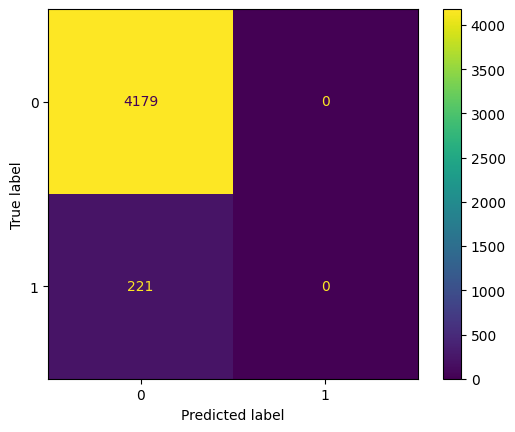

In [11]:
print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)

disp.plot()

plt.show()

In [12]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print(classification_report(Y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.9497727272727273
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4179
           1       0.00      0.00      0.00       221

    accuracy                           0.95      4400
   macro avg       0.47      0.50      0.49      4400
weighted avg       0.90      0.95      0.93      4400

Confusion Matrix:
[[4179    0]
 [ 221    0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Importance*

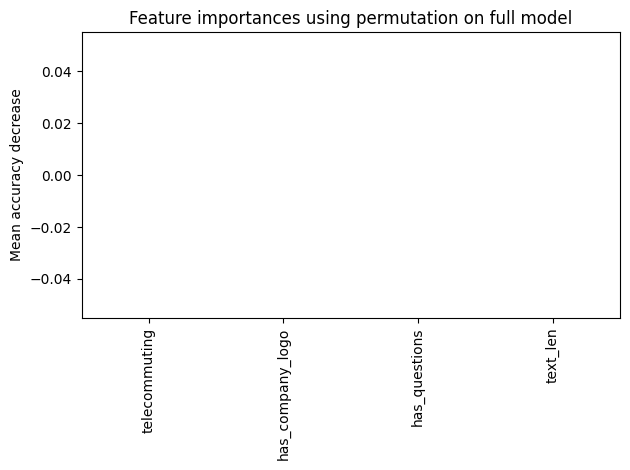

In [13]:
result = permutation_importance(logistic_regression, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()